# **Laboratorijska vježba 8**: Zadaci za samostalni rad

## **Klasifikacija zrna pšenice**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o zrnima triju različitih sorti pšenice: Kama, Rosa i Kanadska. Za svaku klasu snimljen je popriličan broj slika tehnikom mekih rendgenskih zraka. Iz slika su izvučene značajke koje opisuju oblik zrna.


In [ ]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [ ]:
seeds = pd.read_csv("Data/seeds.csv")
seeds.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## **Zadatak 1: Priprema skupa podataka**

Predobradite skup podataka na način da zadržite samo smislene značajke. Iscrtajte histogram vrijednosti za svaku značajku.

In [ ]:
feature_columns = ["area",	
                   "perimeter",	
                   "compactness",	
                   "lengthOfKernel",	
                   "widthOfKernel",	
                   "asymmetryCoefficient",	
                   "lengthOfKernelGroove"]

y = seeds['seedType']
seeds = seeds[feature_columns]
seeds.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


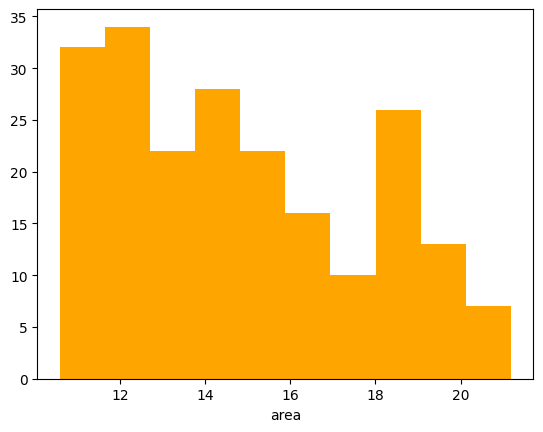

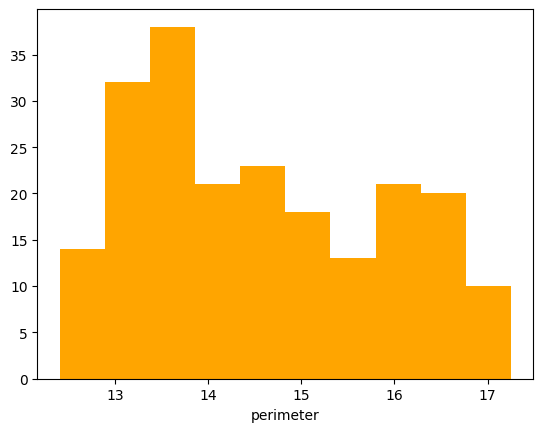

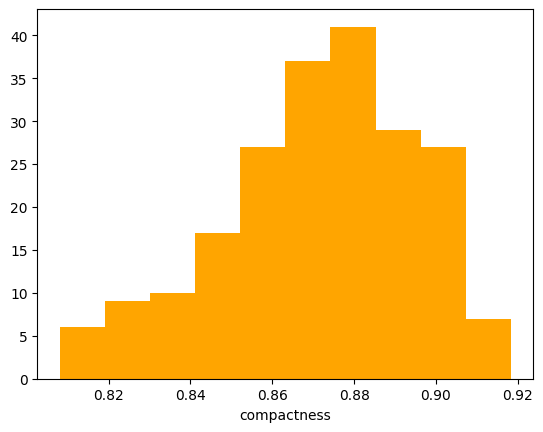

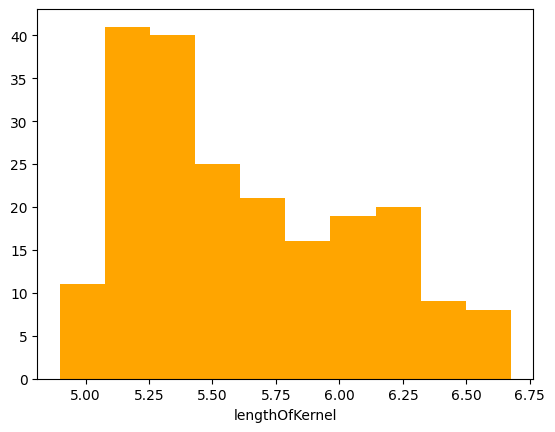

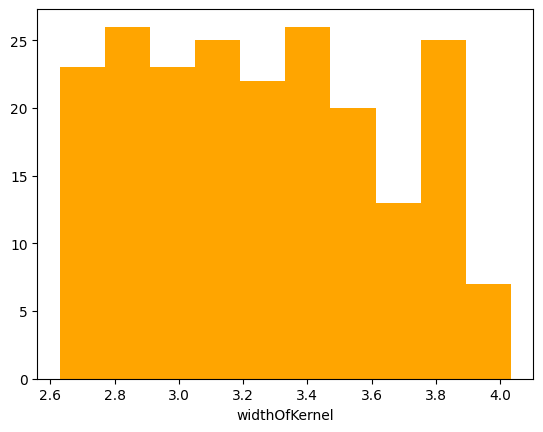

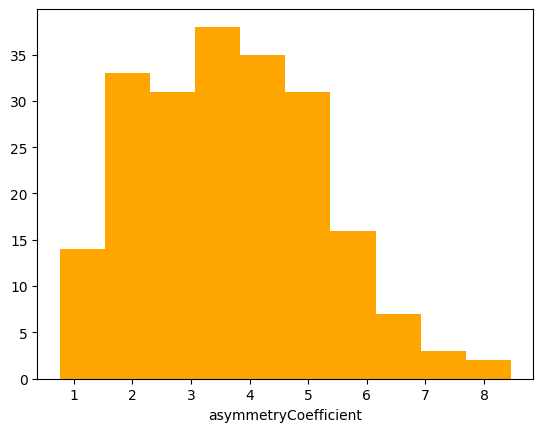

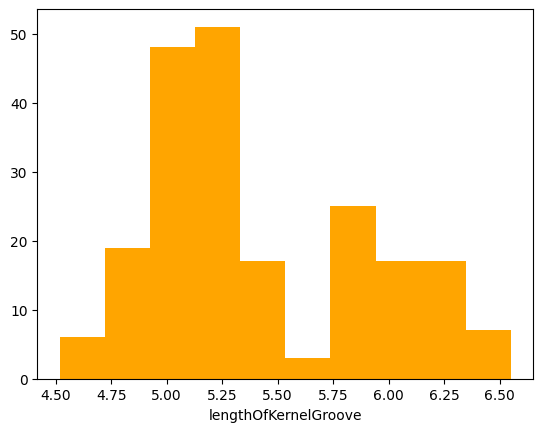

In [ ]:
for feature in feature_columns:
  plt.hist(x=seeds[feature], bins = 10, color = "orange")
  plt.xlabel(feature)
  plt.show()

S obzirom na to da značajke imaju različite intervale vrijednosti, poželjno ih je normalizirati. Normalizirajte značajke prigodnom metodom normalizacije. 

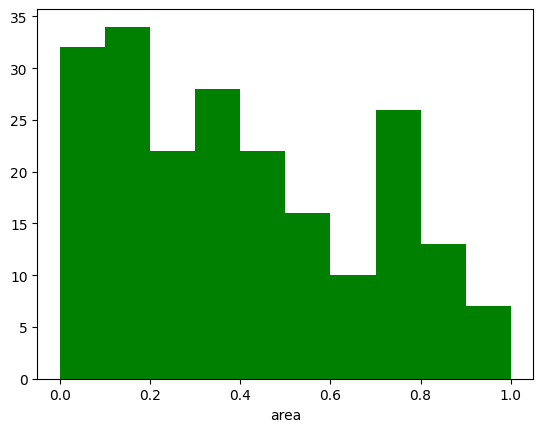

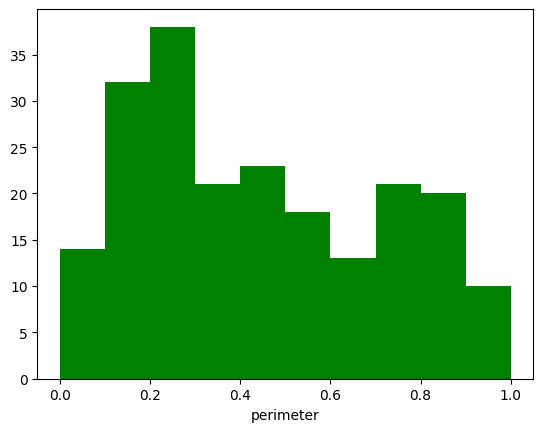

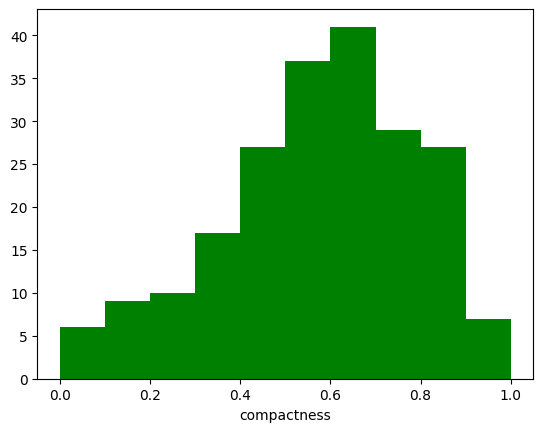

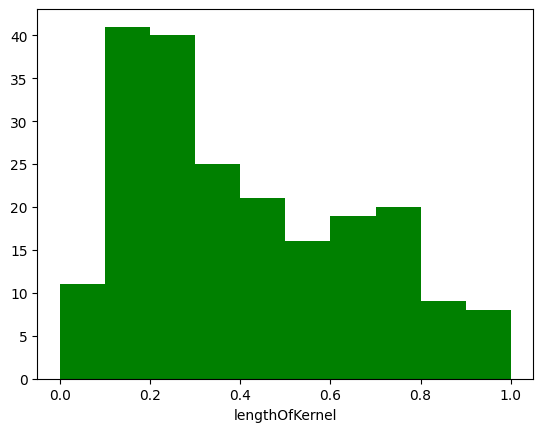

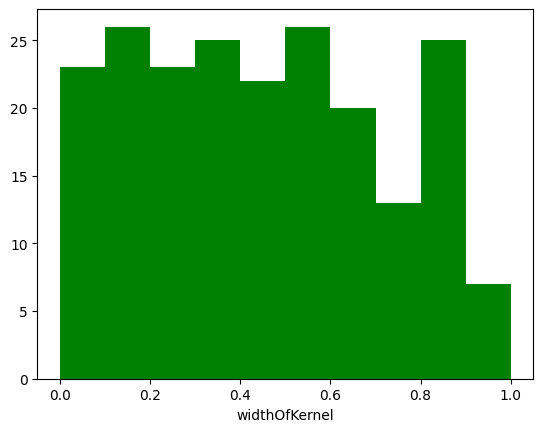

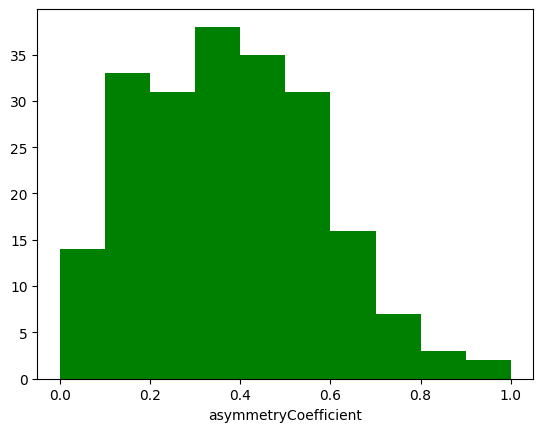

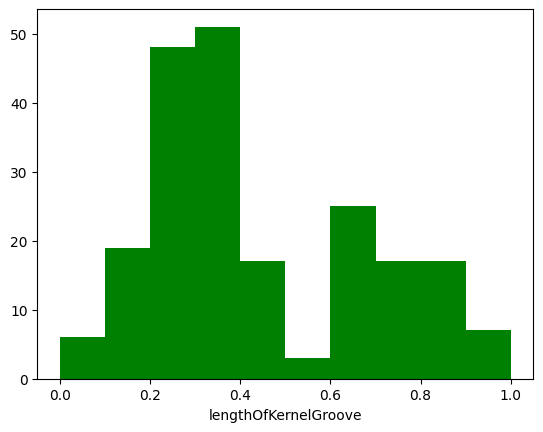

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Fit the scaler to your data
scaler.fit(seeds)

# Transform the data
normalized = scaler.transform(seeds)

#normalized = preprocessing.normalize(seeds[feature_columns], norm='max', axis=0)
for i in range(0,7):
  plt.hist(x=normalized[:,i], bins = 10, color = "green")
  plt.xlabel(feature_columns[i])
  plt.show()


## **Zadatak 2: Grupiranje pomoću algoritma $k$-means**

Pomoću metode lakta pronađite najprikladniju vrijednost za parametar $k$ u algoritmu $k$-means.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

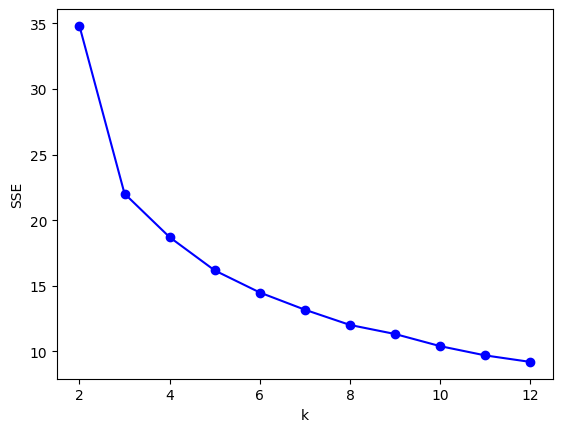

In [ ]:
def plot_sse(features_X, start=2, end=13):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})

    sse = pd.DataFrame(sse)
    # Plot the data
    plt.plot(sse.k, sse.sse, 'bo-')
    plt.xlabel("k")
    plt.ylabel("SSE")
    
plot_sse(normalized)

#3 je najbolji k jer je značajan pad vrijednosti SSE-a 

## **Zadatak 3: Vizualizacija grupa algoritma $k$-means**

Pomoću t-SNE metode za smanjenje dimenzionalnosti svedite skup podataka na dvije komponente.  

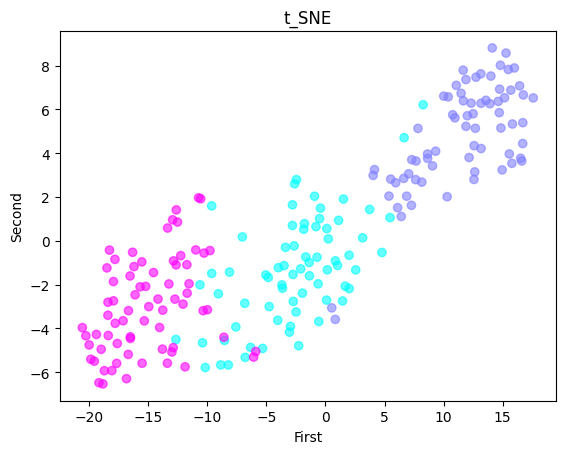

In [ ]:
#T-distributed Stochastic Neighbor Embedding.
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(normalized)
#learning_rate='auto', init='random', perplexity=8, n_iter=500

X_embedded.shape

plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, alpha=0.6, cmap='cool')
plt.title("t_SNE")
plt.xlabel("First")
plt.ylabel("Second")
plt.show()

Zatim grupirajte skup podataka pomoću algoritma $k$-means, gdje za parametar $k$ koristite najbolju vrijednost iz prošlog zadatka.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


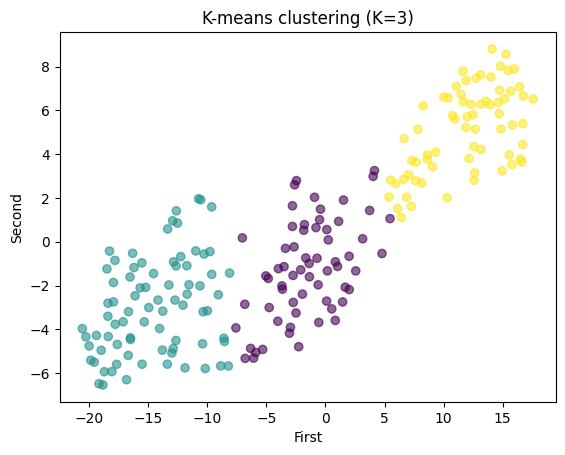

In [ ]:
kmean = KMeans(n_clusters=3, random_state=10).fit(X_embedded)
plt.scatter(X_embedded[:,0], X_embedded[:,1],c=kmean.labels_, alpha=0.6)
plt.title("K-means clustering (K=3)")
plt.xlabel("First")
plt.ylabel("Second")
plt.show()

Pomoću dva dijagrama raspršenosti vizualizirajte skup podataka prije (s poznatim oznakama klasa) i nakon grupiranja (s novododanim oznakama grupa). 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


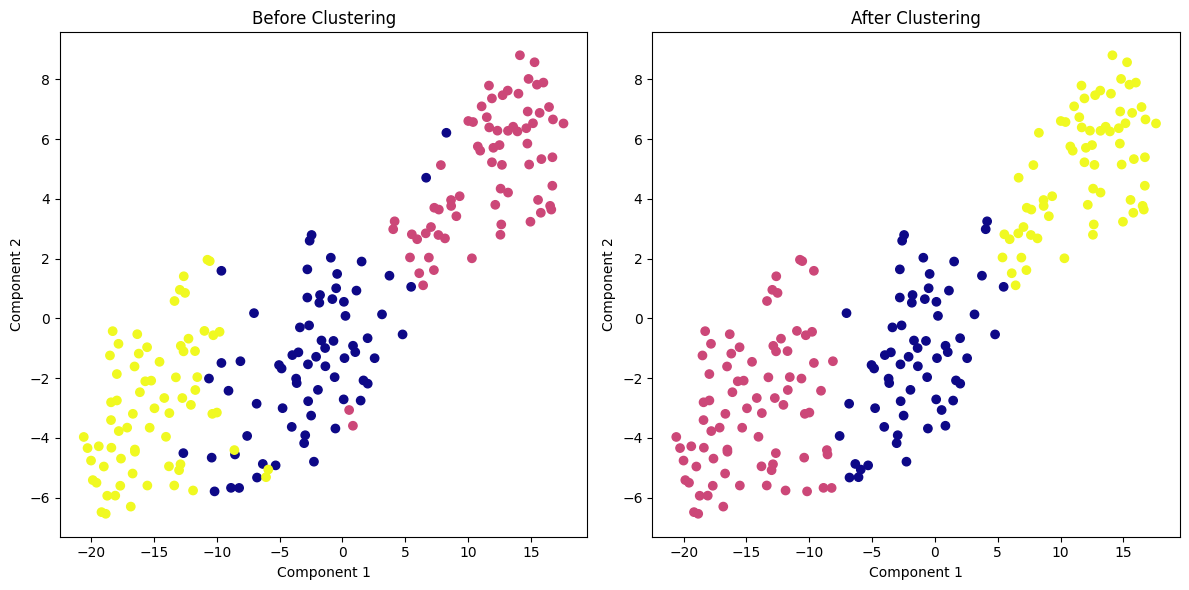

In [ ]:
# y kao izlazne veličine , poznate oznake klasa pšenica

# Create two subplots 
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

X_tsne=X_embedded

# Plot before clustering 
axs[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="plasma")
axs[0].set_xlabel("Component 1")
axs[0].set_ylabel("Component 2")
axs[0].set_title("Before Clustering")

kmean = KMeans(n_clusters=3, random_state=10).fit(X_tsne)
# Plot after clustering with cluster labels
axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmean.labels_, cmap="plasma")
axs[1].set_xlabel("Component 1")
axs[1].set_ylabel("Component 2")
axs[1].set_title("After Clustering")

plt.tight_layout()
plt.show()


# **Klasifikacija sorti vina**

U ovoj laboratorijskoj vježbi također ćemo istražiti skup podataka koji sadrži podatke o različitim sortama vina. Skup podataka sadrži značajke koje predstavljaju rezultate kemijske analize vina uzgojenih u istoj regiji u Italiji, ali koja potječu od tri različite sorte. Kemijskom analizom su utvrđene količine 13 sastojaka koji se nalaze u svakoj od tri vrste vina.


In [ ]:
wines = pd.read_csv("Data/wine.csv")
wines.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## **Zadatak 4: Grupiranje pomoću algoritma $k$-means**

U skupu podataka retci nemaju oznake. Pomoću algoritma $k$-means grupirajte skup podataka te definirajte nedostajuće oznake. Odaberite prikladan broj grupa. Provjerite ima li normalizacija značajki utjecaj na performanse algoritma $k$-means.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

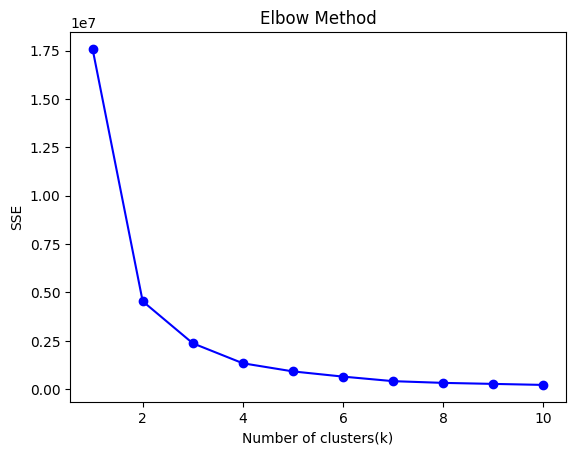

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wine_data = wines.copy()

wcss = [] #within-cluster sum of squares
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(wine_data)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, "bo-")
plt.title('Elbow Method')
plt.xlabel('Number of clusters(k)')
plt.ylabel('SSE')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

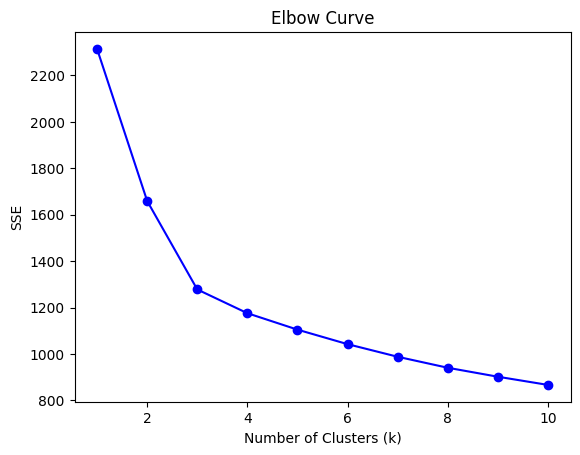

In [ ]:
#Normalizacija

scaler = StandardScaler()
normalized = scaler.fit_transform(wine_data)

wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, "bo-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE")#Inertia (WCSS)
plt.title("Elbow Curve")
plt.show()

#Normalizacijom je lakše uočiti da je broj grupa = 3

Pomoću t-SNE metode za smanjenje dimenzionalnosti svedite skup podataka na dvije komponente te vizualizirajte novostvorene grupe.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


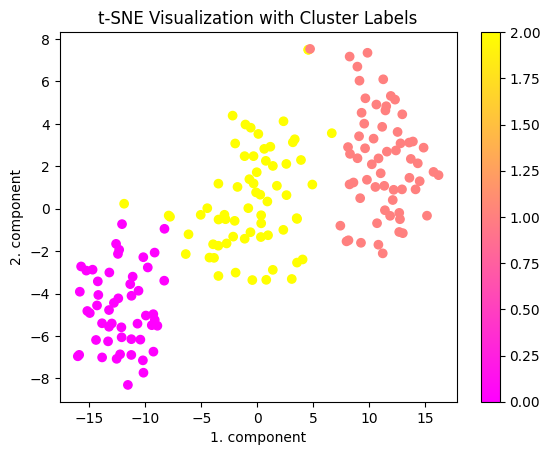

In [ ]:
from sklearn.manifold import TSNE

scaler = StandardScaler()
features = wine_data.columns
wine_data[features] = scaler.fit_transform(wine_data[features])


tsne = TSNE(n_components=2, random_state=42 )#perplexity=3,n_iter=500
wine_data_tsne = tsne.fit_transform(wine_data)

kmeans = KMeans(n_clusters=3, random_state=42).fit(wine_data)
labels = kmeans.predict(wine_data)

plt.scatter(wine_data_tsne[:,0], wine_data_tsne[:,1], c=labels, cmap = "spring")
plt.xlabel('1. component')
plt.ylabel('2. component')
plt.title("t-SNE Visualization with Cluster Labels")
plt.colorbar()
plt.show()

## **Zadatak 5: Grupiranje pomoću algoritma DBSCAN**

U skupu podataka retci nemaju oznake. Pomoću algoritma DBSCAN grupirajte skup podataka te definirajte nedostajuće oznake. Odaberite prikladan broj grupa.



In [ ]:
labels = DBSCAN(eps=2.2).fit_predict(wine_data)
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0 -1
 -1  0 -1 -1  0  0  0  0  0 -1  0  0  0 -1 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1 -1  1]


Pomoću t-SNE metode za smanjenje dimenzionalnosti svedite skup podataka na dvije komponente te vizualizirajte novostvorene grupe.

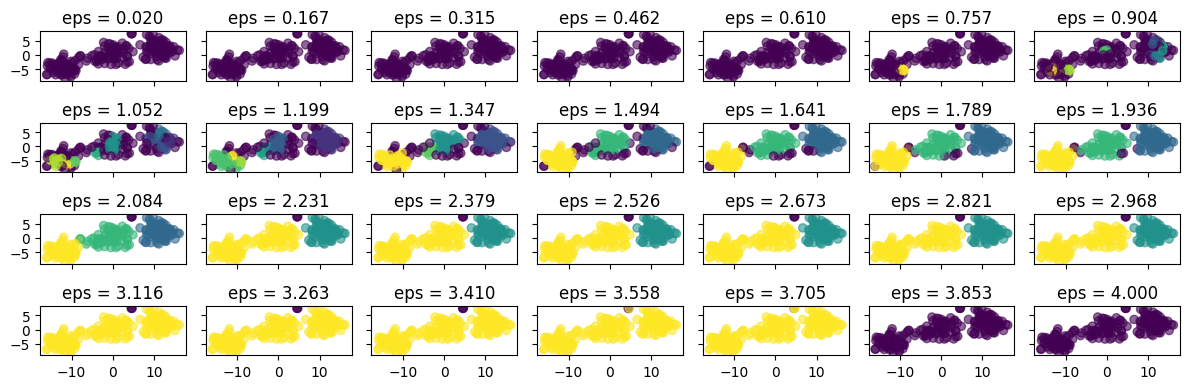

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(wine_data)

# Lista epsilon vrijednosti
eps_list = np.linspace(0.02, 4, 28)

COLUMNS = 7
ROWS = math.ceil(len(eps_list)/COLUMNS)

fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(12, 4), sharey=True, sharex=True)

for i in range(0, len(eps_list)):
    eps = eps_list[i]
    
    current_column = i%COLUMNS
    current_row = i//COLUMNS
    
    ax = axs[current_row, current_column]
    labels = DBSCAN(eps=eps).fit_predict(X_tsne)
    ax.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, alpha=0.6)
    ax.set_title("eps = {:.3f}".format(eps))
    
plt.tight_layout()

#Povećanjem epsilona se smanjuje br. grupa , najbolja vrijednost epsilona je 2.084